<a href="https://colab.research.google.com/github/DONGRYEOLLEE1/PYTHON/blob/main/20210629.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [2]:
!apt-get install g++ openjdk-8-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
openjdk-8-jdk is already the newest version (8u292-b10-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 81 not upgraded.


In [3]:
!pip install konlpy JPype1-py3

In [4]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [5]:
from konlpy.tag import Mecab
tokenizer = Mecab()

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import konlpy

In [8]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ratings_train.txt', delimiter='\t', keep_default_na = False)

In [9]:
df_train.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [10]:
df_train = df_train[df_train['document'].notnull()]

In [11]:
import re
df_train['document'] = df_train['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

In [12]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ratings_test.txt', delimiter='\t', keep_default_na = False)

In [13]:
from konlpy.tag import Mecab
tokenizer = Mecab()

In [14]:
string_test = "아버지가 방에 들어가신다"
tokenizer.morphs(string_test)

['아버지', '가', '방', '에', '들어가', '신다']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
def mecab_tokenizer(text):
  return tokenizer.morphs(text)

In [17]:
tfidf = TfidfVectorizer(tokenizer = mecab_tokenizer, ngram_range=(1,2), min_df = 3, max_df = 0.9)

In [18]:
tfidf.fit(df_train['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=3, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function mecab_tokenizer at 0x7f7e78e59a70>,
                use_idf=True, vocabulary=None)

In [19]:
df_train_tfidf = tfidf.transform(df_train['document'])

In [20]:
df_test_tfidf = tfidf.transform(df_test['document'])

In [21]:
from sklearn.svm import LinearSVC

In [22]:
svm = LinearSVC()
svm.fit(df_train_tfidf, df_train['label'])
svm.score(df_train_tfidf, df_train['label'])

0.9622666666666667

In [23]:
test_pred = svm.predict(df_test_tfidf)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(df_test['label'], test_pred)

0.86098

In [26]:
#s1 = input("너의 말은?:")

In [27]:
import re
s1 = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(s1)
print(s1)

NameError: ignored

In [ ]:
s1 = [" ".join(s1)]
print(s1)

In [ ]:
s1_tfidf = tfidf.transform(s1)
s1_pred = svm.predict(s1_tfidf)

In [ ]:
if (s1_pred==0):
  print("저런.. 기분이 안 좋구나")
else:
  print("기분이 좋구나?")

In [28]:
import json
with open('/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news.json') as j_f:
  data = json.load(j_f)

In [ ]:
print(data)

In [29]:
data_title = []
data_description = []

for item in data:
  data_title.append(item['title'])
  data_description.append(item['description'])

In [ ]:
data_title[:3]

In [ ]:
data_description[:3]

In [30]:
data_df = pd.DataFrame({'title': data_title, 'description' : data_description})

In [31]:
# 텍스트 전처리

### 한글 외의 문자 제거하기
data_df['title'] = data_df['title'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
data_df['description'] = data_df['description'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

data_df.head()

,title,description
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...


In [32]:
# 감성 분석

### 감성 분석 수행 후 결과값을 데이터프레임에 저장하기
data_title_tfidf = tfidf.transform(data_df['title'])

data_title_pred = svm.predict(data_title_tfidf)

data_df['title_label'] = data_title_pred

In [33]:
data_description_tfidf = tfidf.transform(data_df['description'])

data_description_pred = svm.predict(data_description_tfidf)

data_df['description_label'] = data_description_pred

In [ ]:
data_df

In [34]:
data_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/코로나_naver_news.csv', encoding = 'euc-kr')

In [ ]:
# 결과 확인 및 시각화

### 감성 분석 결과 확인
print(data_df['title_label'].value_counts())

print(data_df['description_label'].value_counts())


In [35]:
columns_name = ['title', 'title_label', 'description', 'description_label']
NEG_data_df = pd.DataFrame(columns = columns_name)
POS_data_df = pd.DataFrame(columns = columns_name)

In [ ]:
NEG_data_df

In [36]:
for i, data in data_df.iterrows():
  title = data['title']
  description = data['description']
  title_label = data['title_label']
  description_label = data['description_label']

  if description_label == 0:
    NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, title_label, description, description_label]], columns = columns_name), ignore_index = True)
  else :
    POS_data_df = POS_data_df.append(pd.DataFrame([[title, title_label, description, description_label]], columns = columns_name), ignore_index = True)

NEG_data_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/NEG_data_df.csv', encoding = 'euc-kr')
POS_data_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/POS_data_df.csv', encoding = 'euc-kr')

In [ ]:
len(NEG_data_df), len(POS_data_df)

In [ ]:
NEG_data_df[:10]

In [ ]:
POS_data_df[:10]

In [37]:
# 명사 단어 추출

POS_description = POS_data_df['description']
POS_description_noun_tk = []

for d in POS_description:
  POS_description_noun_tk.append(tokenizer.nouns(d))

In [39]:
POS_description_noun_join = []

for d in POS_description_noun_tk:
  d2 = [w for w in d if len(w)>1]
  POS_description_noun_join.append(" ".join(d2))
POS_description_noun_join

['변화 핵심 우리 사회 신종 코로나 바이러스 감염증 코로나 위기 미래 모른다 국가 국민 어려움 해결 저희',
 '한편 코로나 해외 재료 사재기 국민 먹거리 안정 생산 포스트 코로나 주요 과제 부각 농민 기본소득 도입 안정 생산 기반 확충',
 '코로나 사태 지속 의대 강의 대부분 대면 실습 강의실 풍경 예전 코로나 대부분 학과 수업',
 '최근 갤러리 현대 창업 주년 기념 작품 전시 코로나 영향 마스크 착용 관람객 미술 트렌드 한국 미술 시장 정태희 서울 옥션 스페셜 리스트 세계 경기 침체 코로나 여파',
 '세계 코로나 전례 위기 국내외 영화 예상 타격 부산 국제 영화제 국내외 상황 인지 예의 주시 정부 방침 권고',
 '코로나 감안 면접 역량 검사 도입 국내 최대 치킨 프랜차이즈 제너 시스 비비 회장 채용 관계자 한국 대표 책임 브랜드 코로나 침체 채용 분위기',
 '오후 서울 중랑구 서울 의료 서울 의료 콘서트 신종 코로나 바이러스 감염증 코로나 환자 진료 수고 의료진 가수 공연 뉴스',
 '플립 러닝 온라인 학습 교실 토론 심화 학습 교실 포스트 코로나 시대 교육 방식 주목 아르고 리더 상황 게임 리더십 유형',
 '도배 장판 침대 장롱 가구 교체 코로나 예방 방역 진행 주거 환경 조성 변미 양동 동장 이웃 봉사 감사',
 '코로나 사태 가운데 병영 생활 손흥민 경험 영국 화제 손흥민 호흡',
 '청와대 해외 낭보 문재인 대통령 포스트 코로나 시대 경제 위기 정상 회담 양국 협력 에너지 의료 확장 최근 카타르 코로나 관련',
 '정하영 김포 시장 혁신 교육 지구 사업 특수 교육 대상자 사업 별도 편성 소외 학생 코로나 교육 과정 운영 판단 학생 안전 방역',
 '방송 세기 노래방 대리 만족 방구석 주제 코로나 노래방 대신 폭발 과거 시청자 무료',
 '플러스 코로나 택트 시대 리얼 글라스 온라인 애플리케이션 개발 세미나 개최 글라스 활용 다양 개발 생태계',
 '전국 투자자 교육 협의회 이달 오후 중국 증시 전문가 코로나 이후 중국 증시 전망 성공 투

In [ ]:
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []
NEG_description_noun_join = []

for d in NEG_description:
  NEG_description_noun_tk.append(tokenizer.nouns(d))

for d in NEG_description_noun_tk:
  d2 = [w for w in d if len(w) > 1]
  NEG_description_noun_join.append(" ".join(d2))
NEG_description_noun_join

In [41]:
POS_tfidf = TfidfVectorizer(tokenizer = mecab_tokenizer, min_df = 2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

In [42]:
POS_vocab = dict()

In [43]:

for idx, word in enumerate(POS_tfidf.get_feature_names()):
  POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key = lambda x: x[1], reverse = True)

In [ ]:
POS_words

In [ ]:
POS_words

In [44]:
NEG_tfidf = TfidfVectorizer(tokenizer = mecab_tokenizer, min_df = 2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

In [45]:
NEG_vocab = dict()

In [46]:
for idx, word in enumerate(NEG_tfidf.get_feature_names()):
  NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key = lambda x: x[1], reverse = True)

In [ ]:
NEG_words

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic') 


([<matplotlib.axis.XTick at 0x7f7e74e51210>,
 [Text(0, 0, '코로나'),
  Text(0, 0, '서울'),
  Text(0, 0, '바이러스'),
  Text(0, 0, '신종'),
  Text(0, 0, '감염증'),
  Text(0, 0, '기업'),
  Text(0, 0, '의료'),
  Text(0, 0, '온라인'),
  Text(0, 0, '경제'),
  Text(0, 0, '시대'),
  Text(0, 0, '지역'),
  Text(0, 0, '확산'),
  Text(0, 0, '극복'),
  Text(0, 0, '사회'),
  Text(0, 0, '시장')])

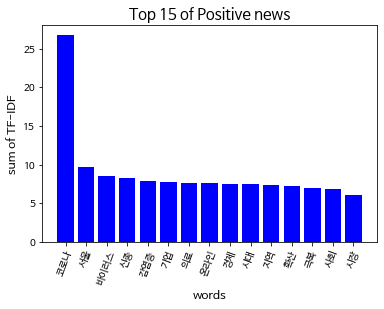

In [48]:
max = 15

plt.bar(range(max), [i[1] for i in POS_words[:max]], color = 'blue')
plt.title("Top 15 of Positive news", fontsize = 15)
plt.xlabel("words", fontsize = 12)
plt.ylabel("sum of TF-IDF", fontsize = 12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation = 70)

In [ ]:
max = 15

plt.bar(range(max), [i[1] for i in NEG_words[:max]], color = 'blue')
plt.title("Top 15 of Negative news", fontsize = 15)
plt.xlabel("words", fontsize = 12)
plt.ylabel("sum of TF-IDF", fontsize = 12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation = 70)

plt.show()

In [49]:
# 토픽 분석 + LDA 토픽 모델

### 데이터 준비
description = data_df['description']

In [ ]:
description_noun_tk = []

# 명사 형태소만 추출
for d in description:
  nouns = tokenizer.nouns(d)
  description_noun_tk.append(nouns)
description_noun_tk

In [51]:
description_noun_tk2 = []

for d in description_noun_tk:
  # 토큰 길이가 1보다 큰것만 추출
  item = [i for i in d if len(i) > 1]
  description_noun_tk2.append(item)

In [ ]:
print(description_noun_tk2)

In [ ]:
### 분석 모델 구축


In [52]:
import gensim
import gensim.corpora as corpora

In [53]:
### LDA 토픽 모델의 입력 벡터 생성하기
dictionary = corpora.Dictionary(description_noun_tk2)
print(dictionary[0], dictionary[1], dictionary[2])


경제 국세 국책


In [54]:
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]
print(corpus)
#### 단어 뭉치(corpus)를 출력하여 (word_id, work_count)의 BoW 구성을 확인

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 1)], [(15, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 1), (33, 1)], [(15, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(11, 1), (15, 2), (40, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(15, 2), (64, 3), (65, 2), (66, 1), (67, 2), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1)], [(15, 2), (40, 1), (49, 1), (51, 1), (58, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1)], [(10, 1), (15, 2), (46, 1), (52, 1), (88, 1), (93, 1), (94, 2

In [55]:
### LDA 토픽 모델의 생성 및 훈련하기
k = 4   # 토픽의 개수 설정

In [56]:
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations = 12, num_topics = k, id2word = dictionary, passes = 1, workers = 10)

In [ ]:
# 결과 확인 및 시각화
## 분석 결과 확인

print(lda_model.print_topics(num_topics = k, num_words = 15))
#### 토픽의 개수(k=4)에 따라 4개의 토픽으로 클러스터링 된 결과가 출력, 
###  num_words = 15에 따라 토픽을 구성하는 주요 단어 15개가 토픽에 대한 영향력 비율과 함께 출력된 것을 확인

#### 비지도학습이니 topic_label이 없음 (0, 1, 2, 3)

In [57]:
import pandas as pd
import numpy as np

In [ ]:
### 분석결과 시각화하기


!pip install pyLDAvis

In [58]:
from wordcloud import WordCloud

In [59]:
dict1 = {'딸기':10, '사과':20, '바나나':15, '키위':5, '멜론':12}

In [60]:
path = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(font_path = path, background_color = 'ivory', width = 800, height = 600)

In [62]:
cloud = wc.generate_from_frequencies(dict1)

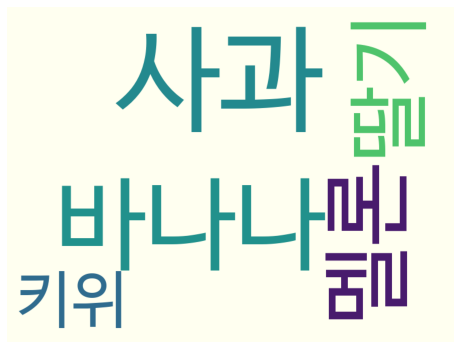

In [63]:
plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
## 20210629 과제

In [ ]:
########## 실행결과가 포함된 ipynb파일제출

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [64]:
from wordcloud import WordCloud

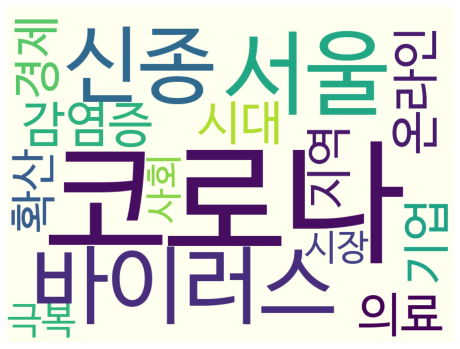

In [65]:
# 긍정어

path = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(font_path = path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(dict(POS_words[:15]))
plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

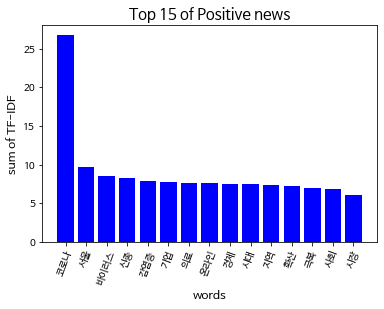

In [66]:
max = 15

plt.bar(range(max), [i[1] for i in POS_words[:15]], color = 'blue')
plt.title("Top 15 of Positive news", fontsize = 15)
plt.xlabel("words", fontsize = 12)
plt.ylabel("sum of TF-IDF", fontsize = 12)
plt.xticks(range(max), [i[0] for i in POS_words[:15]], rotation = 70)

plt.show()

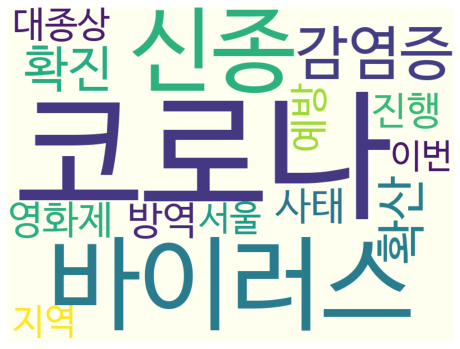

In [67]:
# 부정어

path = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(font_path = path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(dict(NEG_words[:15]))
plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

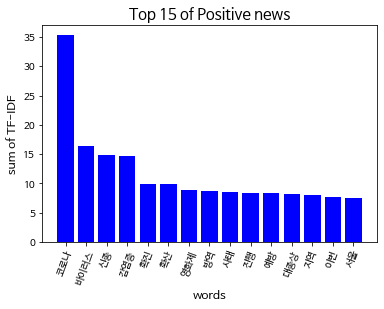

In [68]:
max = 15

plt.bar(range(max), [i[1] for i in NEG_words[:max]], color = 'blue')
plt.title("Top 15 of Positive news", fontsize = 15)
plt.xlabel("words", fontsize = 12)
plt.ylabel("sum of TF-IDF", fontsize = 12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation = 70)

plt.show()